In [139]:
import pandas as pd
import re
import nltk
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud



In [46]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/camillecu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/camillecu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
path = "Scripts TBBT.csv" 
df = pd.read_csv(path , sep = "," , skipinitialspace=True, engine="python")
df.head()


,episode_name,dialogue,person_scene
0,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,Scene
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon
2,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon
4,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard


In [65]:
# list of distinct characters in person_scene column
characters = df['person_scene'].unique()
characters

array(['Scene', 'Sheldon', 'Leonard', 'Receptionist', 'Penny', '(mouths)',
       'back)', 'Howard', 'Raj', 'Raj)', 'buzzer)', 'buzzer', 'Voice',
       'man', 'Man', '(sings)', '(off)', 'together', '(snarkily)',
       '(entering)', 'likewise)', 'off)', 'door)', 'talk)',
       '(internally)', 'mat)', 'him)', 'ear)', 'Teleplay', 'Story',
       'hallway)', 'Doug', 'Lesley', 'instructor', 'Leonard)',
       '(singing)', 'Waitress', 'Summer', 'Sheldon)', 'Gablehouser',
       'round)', 'supplements)', 'Cooper', 'Cooper)', 'chair)',
       '(leaving)', 'quartettist', 'room)', 'apartment)', '(inside)',
       '(arriving)', 'costume)', 'All', 'Thor)', 'off-screen)', 'Girl',
       'Costume', 'Kurt', 'ground)', 'entering)', 'doorway)', 'phone',
       'television)', 'again)', 'Christie', 'Waiter', '(answering)',
       '(voice)', 'within)', 'women)', 'Koothrappali', 'Together',
       'gather)', 'phone)', 'Lalita', 'Penny)', 'embarrassed)',
       'mailbox)', 'glasses)', 'down)', 'floor)', 

## Amy - Beste
## Bernadette - Camille
## Sheldon
## Penny
## Leonard
## Raj

In [ ]:
# create a sub dataframe with only the selected characters
selected_characters = ['Sheldon', 'Leonard', 'Penny', 'Howard', 'Raj', 'Amy', 'Bernadette']
sub_df = df[df['person_scene'].str.contains('|'.join(selected_characters))]
sub_df = sub_df.reset_index(drop=True)
sub_df

,episode_name,dialogue,person_scene
0,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon
1,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard
2,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon
3,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard
4,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard
...,...,...,...
45034,Series 10 Episode 24 – The Long Distance Disso...,"Uh, breakfast yes, lunch no. I did have a cou...",Sheldon
45035,Series 10 Episode 24 – The Long Distance Disso...,How thoughtful. Thank you.,Sheldon
45036,Series 10 Episode 24 – The Long Distance Disso...,"And I with you. Question, are you seeking a r...",Sheldon
45037,Series 10 Episode 24 – The Long Distance Disso...,"Well, that would raise a number of problems. ...",Sheldon


In [49]:
def clean_text(text):
    # clean punctuation
    text = re.sub(r"[’!”#$%&()*+,-.:;?@[\]^_`{|}~]", "", str(text))
    # lower
    return text.lower()

In [50]:
def process_words(text):
    # tokenization
    sentences = nltk.tokenize.sent_tokenize(text)
    words = nltk.tokenize.word_tokenize(text)
    # remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    filter_words = [word for word in words if word not in stop_words]
    # stemming 
    porter = nltk.stem.PorterStemmer()
    stemmed_words = [porter.stem(word) for word in filter_words]
    return {
        "sentences" : sentences,
        "filtered_words" : filter_words,
        "stemmed_words" : stemmed_words
    }

In [51]:
def pos_ner(text):
    doc = nlp(text)
    pos_tag = [(token.text, token.pos_) for token in doc]
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return {
        "pos_tags": pos_tag,
        "entities" : entities
    }

In [86]:
processed_data = []
for text in sub_df['dialogue']:
    cleaned = clean_text(text)
    processed = process_words(cleaned)
    ner_pos = pos_ner(" ".join(processed["filtered_words"]))
    processed_data.append({
        "org_text": text,
        "cleaned_text": cleaned,
        "filtered_words": processed["filtered_words"],
        "stemmed_words": processed["stemmed_words"],
        "pos_tags": ner_pos["pos_tags"],
        'entities': ner_pos['entities']
    }
    )

In [92]:
sub_df['filtered_words'] = [data['filtered_words'] for data in processed_data]
sub_df['stemmed_words'] = [data['stemmed_words'] for data in processed_data]
sub_df['pos_tags'] = [data['pos_tags'] for data in processed_data]
sub_df['entities'] = [data['entities'] for data in processed_data]



In [93]:
sub_df

,episode_name,dialogue,person_scene,filtered_words,stemmed_words,pos_tags,entities
0,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon,"[photon, directed, plane, two, slits, either, ...","[photon, direct, plane, two, slit, either, sli...","[(photon, PROPN), (directed, VERB), (plane, NO...","[(two, CARDINAL)]"
1,Series 01 Episode 01 – Pilot Episode,"Agreed, what’s your point?",Leonard,"[agreed, whats, point]","[agre, what, point]","[(agreed, VERB), (what, PRON), (s, VERB), (poi...",[]
2,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon,"[theres, point, think, good, idea, teeshirt]","[there, point, think, good, idea, teeshirt]","[(there, PRON), (s, VERB), (point, NOUN), (thi...",[]
3,Series 01 Episode 01 – Pilot Episode,Excuse me?,Leonard,[excuse],[excus],"[(excuse, VERB)]",[]
4,Series 01 Episode 01 – Pilot Episode,"One across is Aegean, eight down is Nabakov, ...",Leonard,"[one, across, aegean, eight, nabakov, twentysi...","[one, across, aegean, eight, nabakov, twentysi...","[(one, NUM), (across, ADP), (aegean, NOUN), (e...","[(one, CARDINAL), (eight, CARDINAL), (fourteen..."
...,...,...,...,...,...,...,...
45034,Series 10 Episode 24 – The Long Distance Disso...,"Uh, breakfast yes, lunch no. I did have a cou...",Sheldon,"[uh, breakfast, yes, lunch, cough, drop, reall...","[uh, breakfast, ye, lunch, cough, drop, realli...","[(uh, INTJ), (breakfast, NOUN), (yes, INTJ), (...",[]
45035,Series 10 Episode 24 – The Long Distance Disso...,How thoughtful. Thank you.,Sheldon,"[thoughtful, thank]","[thought, thank]","[(thoughtful, ADJ), (thank, NOUN)]",[]
45036,Series 10 Episode 24 – The Long Distance Disso...,"And I with you. Question, are you seeking a r...",Sheldon,"[question, seeking, romantic, relationship]","[question, seek, romant, relationship]","[(question, NOUN), (seeking, VERB), (romantic,...",[]
45037,Series 10 Episode 24 – The Long Distance Disso...,"Well, that would raise a number of problems. ...",Sheldon,"[well, would, raise, number, problems, colleag...","[well, would, rais, number, problem, colleagu,...","[(well, INTJ), (would, AUX), (raise, VERB), (n...",[]


In [94]:
sub_df.to_csv('processed_data.csv', index=False)

In [ ]:
Amy = df[df['person_scene'].str.contains('Amy')]
data_amy = Amy['dialogue']

processed_data_amy = []
for text in data_amy:
    cleaned = clean_text(text)
    processed = process_words(cleaned)
    ner_pos = pos_ner(" ".join(processed["filtered_words"]))
    processed_data_amy.append({
        "org_text": text,
        "cleaned_text": cleaned,
        "filtered_words": processed["filtered_words"],
        "stemmed_words": processed["stemmed_words"],
        "pos_tags": ner_pos["pos_tags"],
        'entities': ner_pos['entities']
    }
    )

In [ ]:
processed_data_amy

[{'org_text': 'Excuse me. I’m Amy Farrah Fowler. You’re Sheldon Cooper.',
  'cleaned_text': 'excuse me im amy farrah fowler youre sheldon cooper',
  'filtered_words': ['excuse',
   'im',
   'amy',
   'farrah',
   'fowler',
   'youre',
   'sheldon',
   'cooper'],
  'stemmed_words': ['excus',
   'im',
   'ami',
   'farrah',
   'fowler',
   'your',
   'sheldon',
   'cooper'],
  'pos_tags': [('excuse', 'NOUN'),
   ('i', 'PRON'),
   ('m', 'VERB'),
   ('amy', 'ADV'),
   ('farrah', 'PROPN'),
   ('fowler', 'PROPN'),
   ('you', 'PRON'),
   ('re', 'VERB'),
   ('sheldon', 'PROPN'),
   ('cooper', 'NOUN')],
  'entities': [('farrah fowler', 'PERSON')]},
 {'org_text': ' If that was slang, I’m unfamiliar with it. If it was literal, I share your aversion to soiled hosiery. In any case, I’m here because my mother and I have agreed that I will date at least once a year.',
  'cleaned_text': ' if that was slang im unfamiliar with it if it was literal i share your aversion to soiled hosiery in any case im h

In [ ]:
for i, data in enumerate(processed_data_amy):
    if "pos_tags" not in data:
        print(f"Missing 'pos_tags' in entry {i}: {data_amy}")

In [89]:
Amy['filtered_words'] = [data_amy['filtered_words'] for data_amy in processed_data_amy]
Amy['stemmed_words'] = [data_amy['stemmed_words'] for data_amy in processed_data_amy]
Amy['pos_tags'] = [data_amy["pos_tags"] for data_amy in processed_data_amy]
Amy['entities'] = [data_amy['entities'] for data_amy in processed_data_amy]


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_6131/3795321010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['filtered_words'] = [data_amy['filtered_words'] for data_amy in processed_data_amy]
/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_6131/3795321010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['stemmed_words'] = [data_amy['stemmed_words'] for data_amy in processed_data_amy]
/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_6131/3795321010.py:3: Set

In [90]:
Amy

,episode_name,dialogue,person_scene,filtered_words,stemmed_words,pos_tags,entities
15116,Series 03 Episode 23 – The Lunar Excitation,Excuse me. I’m Amy Farrah Fowler. You’re Sheld...,Amy,"[excuse, im, amy, farrah, fowler, youre, sheld...","[excus, im, ami, farrah, fowler, your, sheldon...","[(excuse, NOUN), (i, PRON), (m, VERB), (amy, A...","[(farrah fowler, PERSON)]"
15118,Series 03 Episode 23 – The Lunar Excitation,"If that was slang, I’m unfamiliar with it. If...",Amy,"[slang, im, unfamiliar, literal, share, aversi...","[slang, im, unfamiliar, liter, share, avers, s...","[(slang, PROPN), (i, PRON), (m, VERB), (unfami...","[(slang, PERSON), (date least year, DATE)]"
15120,Series 03 Episode 23 – The Lunar Excitation,"I don’t object to the concept of a deity, but...",Amy,"[dont, object, concept, deity, im, baffled, no...","[dont, object, concept, deiti, im, baffl, noti...","[(do, AUX), (nt, PART), (object, VERB), (conce...",[]
15122,Series 03 Episode 23 – The Lunar Excitation,"Noted. Now, before this goes any further, you...",Amy,"[noted, goes, know, forms, physical, contact, ...","[note, goe, know, form, physic, contact, inclu...","[(noted, VERB), (goes, VERB), (know, VERB), (f...",[]
15124,Series 03 Episode 23 – The Lunar Excitation,"Tepid water, please.",Amy,"[tepid, water, please]","[tepid, water, pleas]","[(tepid, NOUN), (water, NOUN), (please, INTJ)]",[]
...,...,...,...,...,...,...,...
54344,Series 10 Episode 24 – The Long Distance Disso...,I was missing you again.,Amy,[missing],[miss],"[(missing, VERB)]",[]
54346,Series 10 Episode 24 – The Long Distance Disso...,She’s what?,Amy,[shes],[she],"[(she, PRON), (s, VERB)]",[]
54348,Series 10 Episode 24 – The Long Distance Disso...,Hi.,Amy,[hi],[hi],"[(hi, INTJ)]",[]
54350,Series 10 Episode 24 – The Long Distance Disso...,Uh-huh. Hang on. (answering phone) Hello. A l...,Amy,"[uhhuh, hang, answering, phone, hello, little,...","[uhhuh, hang, answer, phone, hello, littl, lat...","[(uhhuh, PROPN), (hang, NOUN), (answering, VER...",[]


In [95]:
Amy.to_csv('processed_data_amy.csv', index=False)

## Question 1 

On average, how many sentences and words does your character have to speak per episode? Does this deviate across seasons?

In [ ]:
sub_df['season'] = sub_df['episode_name'].str.extract(r'Series (\d+)').astype(int)
sub_df['episode'] = sub_df['episode_name'].str.extract(r'Episode (\d+)').astype(int)


In [101]:
Amy['season'] = Amy['episode_name'].str.extract(r'Series (\d+)').astype(int)
Amy['episode'] = Amy['episode_name'].str.extract(r'Episode (\d+)').astype(int)


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_6131/2285516059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['season'] = Amy['episode_name'].str.extract(r'Series (\d+)').astype(int)
/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_6131/2285516059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy['episode'] = Amy['episode_name'].str.extract(r'Episode (\d+)').astype(int)


In [102]:

def calculate_counts(dialogue):
    sentences = nltk.sent_tokenize(dialogue)
    words = nltk.word_tokenize(dialogue)
    return len(sentences), len(words)


In [103]:
# Apply to calculate sentence and word counts for Amy
Amy[['sentence_count', 'word_count']] = Amy['dialogue'].apply(
    lambda x: pd.Series(calculate_counts(x))
)

amy_stats = Amy.groupby(["season", "episode"]).agg(
    total_sentences =("sentence_count", "sum"),
    total_words = ("word_count", "sum"),
).reset_index()

amy_stats["avg_sentences_per_episode"] = amy_stats["total_sentences"]
amy_stats["avg_words_per_episode"] = amy_stats["total_words"]

amy_season_stats = amy_stats.groupby(["season"]).agg(
    total_sentences =("avg_sentences_per_episode", "mean"),
    total_words = ("avg_words_per_episode", "mean"),
).reset_index()


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_6131/418221721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Amy[['sentence_count', 'word_count']] = Amy['dialogue'].apply(


In [104]:
amy_stats

,season,episode,total_sentences,total_words,avg_sentences_per_episode,avg_words_per_episode
0,3,23,10,126,10,126
1,4,1,23,172,23,172
2,4,3,63,587,63,587
3,4,5,32,264,32,264
4,4,8,70,744,70,744
...,...,...,...,...,...,...
149,10,20,30,282,30,282
150,10,21,33,256,33,256
151,10,22,33,316,33,316
152,10,23,67,606,67,606


In [105]:
amy_season_stats

,season,total_sentences,total_words
0,3,10.000000,126.000000
1,4,40.600000,397.733333
2,5,34.476190,352.761905
3,6,31.318182,291.545455
4,7,31.083333,285.500000
5,8,28.916667,280.375000
6,9,33.826087,303.478261
7,10,40.083333,373.125000


In [ ]:
# Apply to calculate sentence and word counts for bernadette
Amy[['sentence_count', 'word_count']] = Amy['dialogue'].apply(
    lambda x: pd.Series(calculate_counts(x))
)

amy_stats = Amy.groupby(["season", "episode"]).agg(
    total_sentences =("sentence_count", "sum"),
    total_words = ("word_count", "sum"),
).reset_index()

amy_stats["avg_sentences_per_episode"] = amy_stats["total_sentences"]
amy_stats["avg_words_per_episode"] = amy_stats["total_words"]

amy_season_stats = amy_stats.groupby(["season"]).agg(
    total_sentences =("avg_sentences_per_episode", "mean"),
    total_words = ("avg_words_per_episode", "mean"),
).reset_index()


In [ ]:
# tokenize again for counting
def calculate_counts(dialogue):
    sentences = nltk.sent_tokenize(dialogue)
    words = nltk.word_tokenize(dialogue)
    return len(sentences), len(words)

# Apply to function
df[['sentence_count', 'word_count']] = df['dialogue'].apply(
    lambda x: pd.Series(calculate_counts(x))
)

# Extract season and episode information
df['season'] = df['episode_name'].str.extract(r'Series (\d+)')
df['episode'] = df['episode_name'].str.extract(r'Episode (\d+)')

# Group by season and episode
character_episode_stats = df.groupby(['season', 'episode']).agg(
    total_sentences=('sentence_count', 'sum'),
    total_words=('word_count', 'sum'),
).reset_index()

# Calculate per season avg
season_stats = character_episode_stats.groupby(['season']).agg(
    avg_sentences_per_episode=('total_sentences', 'mean'),
    avg_words_per_episode=('total_words', 'mean')
).reset_index()

# Calculate per season deviations
season_dev = character_episode_stats.groupby(['season']).agg(
    sentences_per_episode_dev=('total_sentences', 'mean'),
    words_per_episode_dev=('total_words', 'mean')
).reset_index()

In [ ]:
print(season_stats)

  season  avg_sentences_per_episode  avg_words_per_episode
0     03                  10.000000             126.000000
1     04                  40.600000             397.733333
2     05                  34.476190             352.761905
3     06                  31.318182             291.545455
4     07                  31.083333             285.500000
5     08                  28.916667             280.375000
6     09                  33.826087             303.478261
7     10                  40.083333             373.125000


#### Calculate sentences and words Bernadette have to speak per episode across seasons


In [129]:
Bernadette = sub_df[sub_df['person_scene'].str.contains('Bernadette')]
Bernadette

,episode_name,dialogue,person_scene,filtered_words,stemmed_words,pos_tags,entities,season,episode
9013,Series 03 Episode 05 – The Creepy Candy Coatin...,Microbiology.,Bernadette,[microbiology],[microbiolog],"[(microbiology, NOUN)]",[],3,5
9015,Series 03 Episode 05 – The Creepy Candy Coatin...,I don’t understand.,Bernadette,"[dont, understand]","[dont, understand]","[(do, AUX), (nt, PART), (understand, VERB)]",[],3,5
9017,Series 03 Episode 05 – The Creepy Candy Coatin...,"I know, I’m studying it.",Bernadette,"[know, im, studying]","[know, im, studi]","[(know, VERB), (i, PRON), (m, AUX), (studying,...",[],3,5
9019,Series 03 Episode 05 – The Creepy Candy Coatin...,Are you sure?,Bernadette,[sure],[sure],"[(sure, ADJ)]",[],3,5
9021,Series 03 Episode 05 – The Creepy Candy Coatin...,No.,Bernadette,[],[],[],[],3,5
...,...,...,...,...,...,...,...,...,...
44964,Series 10 Episode 24 – The Long Distance Disso...,"Fine, hundreds.",Bernadette,"[fine, hundreds]","[fine, hundr]","[(fine, ADJ), (hundreds, NOUN)]","[(hundreds, CARDINAL)]",10,24
44972,Series 10 Episode 24 – The Long Distance Disso...,Can I just squeeze in here?,Bernadette,[squeeze],[squeez],"[(squeeze, VERB)]",[],10,24
44984,Series 10 Episode 24 – The Long Distance Disso...,"I threw my body at them, what else did you wa...",Bernadette,"[threw, body, else, want]","[threw, bodi, els, want]","[(threw, VERB), (body, NOUN), (else, ADV), (wa...",[],10,24
45003,Series 10 Episode 24 – The Long Distance Disso...,To do what? Shake a can of nickels at them?,Bernadette,"[shake, nickels]","[shake, nickel]","[(shake, NOUN), (nickels, NOUN)]",[],10,24


In [135]:
# Apply to calculate sentence and word counts for bernadette
Bernadette[['sentence_count', 'word_count']] = Bernadette['dialogue'].apply(
    lambda x: pd.Series(calculate_counts(x))
)

Bernadette_stats = Bernadette.groupby(["season", "episode"]).agg(
    total_sentences =("sentence_count", "sum"),
    total_words = ("word_count", "sum"),
).reset_index()


Bernadette_season_stats = Bernadette_stats.groupby(["season"]).agg(
    total_sentences =("total_sentences", "sum"),
    total_words = ("total_words", "sum"),
)


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_6131/2950851961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bernadette[['sentence_count', 'word_count']] = Bernadette['dialogue'].apply(


In [131]:
Bernadette_stats

,season,episode,total_sentences,total_words
0,3,5,27,196
1,3,9,25,205
2,3,10,53,426
3,3,12,10,81
4,3,14,14,125
...,...,...,...,...
156,10,20,39,401
157,10,21,39,372
158,10,22,34,347
159,10,23,36,316


In [136]:
Bernadette_season_stats

,total_sentences,total_words
season,,
3,129,1033
4,389,3194
5,494,4484
6,510,4640
7,537,5176
8,573,5230
9,559,4828
10,623,5870


## Question 2
Globally, over all episodes within the first 10 seasons, how many times does your character mention nouns, and person names? Make a Wordcloud of this tag/entity to have a clear visualization which nouns/person names are mostly used by your character.


In [120]:
Bernadette = sub_df[sub_df['person_scene'].str.contains('Bernadette')]
Bernadette

,episode_name,dialogue,person_scene,filtered_words,stemmed_words,pos_tags,entities,season,episode
9013,Series 03 Episode 05 – The Creepy Candy Coatin...,Microbiology.,Bernadette,[microbiology],[microbiolog],"[(microbiology, NOUN)]",[],3,5
9015,Series 03 Episode 05 – The Creepy Candy Coatin...,I don’t understand.,Bernadette,"[dont, understand]","[dont, understand]","[(do, AUX), (nt, PART), (understand, VERB)]",[],3,5
9017,Series 03 Episode 05 – The Creepy Candy Coatin...,"I know, I’m studying it.",Bernadette,"[know, im, studying]","[know, im, studi]","[(know, VERB), (i, PRON), (m, AUX), (studying,...",[],3,5
9019,Series 03 Episode 05 – The Creepy Candy Coatin...,Are you sure?,Bernadette,[sure],[sure],"[(sure, ADJ)]",[],3,5
9021,Series 03 Episode 05 – The Creepy Candy Coatin...,No.,Bernadette,[],[],[],[],3,5
...,...,...,...,...,...,...,...,...,...
44964,Series 10 Episode 24 – The Long Distance Disso...,"Fine, hundreds.",Bernadette,"[fine, hundreds]","[fine, hundr]","[(fine, ADJ), (hundreds, NOUN)]","[(hundreds, CARDINAL)]",10,24
44972,Series 10 Episode 24 – The Long Distance Disso...,Can I just squeeze in here?,Bernadette,[squeeze],[squeez],"[(squeeze, VERB)]",[],10,24
44984,Series 10 Episode 24 – The Long Distance Disso...,"I threw my body at them, what else did you wa...",Bernadette,"[threw, body, else, want]","[threw, bodi, els, want]","[(threw, VERB), (body, NOUN), (else, ADV), (wa...",[],10,24
45003,Series 10 Episode 24 – The Long Distance Disso...,To do what? Shake a can of nickels at them?,Bernadette,"[shake, nickels]","[shake, nickel]","[(shake, NOUN), (nickels, NOUN)]",[],10,24


In [125]:
# count how many times Bernadette mention nouns given pos_tags column
def count_nouns(pos_tags):
    return len([tag for tag in pos_tags if tag[1] in ['NOUN']])
Bernadette['noun_count'] = Bernadette['pos_tags'].apply(count_nouns)

# sum the noun counts
Bernadette_noun_stats = Bernadette.groupby(["season", "episode"]).agg(
    total_nouns =("noun_count", "sum"),
).reset_index()

Bernadette_noun_stats


/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_6131/2608377734.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bernadette['noun_count'] = Bernadette['pos_tags'].apply(count_nouns)


,season,episode,total_nouns
0,3,5,30
1,3,9,21
2,3,10,51
3,3,12,9
4,3,14,22
...,...,...,...
156,10,20,40
157,10,21,43
158,10,22,39
159,10,23,27


In [126]:
# count how many times Bernadette mentions person names given entities column
def count_persons(entities):
    return len([ent for ent in entities if ent[1] == 'PERSON'])
Bernadette['person_count'] = Bernadette['entities'].apply(count_persons)

# sum the person counts
Bernadette_person_stats = Bernadette.groupby(["season", "episode"]).agg(
    total_persons =("person_count", "sum"),
).reset_index()

Bernadette_person_stats

/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_6131/2681818103.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bernadette['person_count'] = Bernadette['entities'].apply(count_persons)


,season,episode,total_persons
0,3,5,0
1,3,9,0
2,3,10,3
3,3,12,0
4,3,14,2
...,...,...,...
156,10,20,3
157,10,21,1
158,10,22,4
159,10,23,0


In [142]:
# create a dataframe listing count of nouns and which nouns mentioned by Bernadette
Bernadette_nouns = Bernadette['pos_tags'].explode().reset_index()
Bernadette_nouns.columns = ['index', 'pos_tags']

# filter only nouns
Bernadette_nouns = Bernadette_nouns[Bernadette_nouns['pos_tags'].str[1] == 'NOUN']
Bernadette_nouns['noun'] = Bernadette_nouns['pos_tags'].str[0]

# count the nouns
Bernadette_noun_count = Bernadette_nouns.groupby('noun').size().reset_index()
Bernadette_noun_count.columns = ['noun', 'count']

# sort the nouns by count
Bernadette_noun_count = Bernadette_noun_count.sort_values(by='count', ascending=False)
Bernadette_noun_count

,noun,count
1329,time,60
757,love,45
576,guys,41
944,penny,38
340,day,36
...,...,...
6,act,1
7,action,1
9,adrenaline,1
11,advance,1


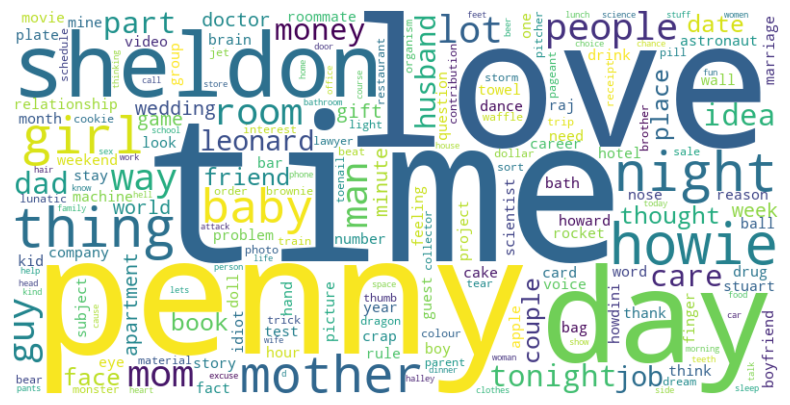

In [143]:
# make a word cloud of the nouns mentioned by Bernadette using Bernadette_noun_count
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(Bernadette_noun_count['noun']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

